#### Import lib

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.weightstats import ztest
from sklearn.model_selection  import train_test_split,cross_val_score,KFold
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import warnings 
warnings.filterwarnings('ignore')
from IPython.display import Image
from six import StringIO
import pydotplus
import graphviz
from sklearn.tree import export_graphviz

In [2]:
data=pd.read_csv('credit.csv')

In [3]:
data.sample(10)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
137,1 - 200 DM,12,good,furniture/appliances,766,500 - 1000 DM,1 - 4 years,4,3,66,none,own,1,unskilled,1,no,yes
582,unknown,9,good,furniture/appliances,1388,< 100 DM,1 - 4 years,4,2,26,none,rent,1,skilled,1,no,no
153,1 - 200 DM,24,critical,car,7758,> 1000 DM,> 7 years,2,4,29,none,rent,1,skilled,1,no,no
456,< 0 DM,11,critical,car,3905,< 100 DM,1 - 4 years,2,2,36,none,rent,2,skilled,2,no,no
342,1 - 200 DM,18,good,furniture/appliances,3213,500 - 1000 DM,< 1 year,1,3,25,none,rent,1,skilled,1,no,no
902,unknown,36,critical,car,10477,unknown,> 7 years,2,4,42,none,other,2,skilled,1,no,no
294,unknown,48,critical,business,7629,unknown,> 7 years,4,2,46,bank,own,2,management,2,no,no
654,unknown,24,critical,car,2346,< 100 DM,4 - 7 years,4,3,35,none,own,2,skilled,1,yes,no
942,unknown,24,good,furniture/appliances,929,unknown,4 - 7 years,4,2,31,store,own,1,skilled,1,yes,no
724,unknown,27,good,car,2570,< 100 DM,1 - 4 years,3,3,21,none,rent,1,skilled,1,no,yes


In [4]:
data.head(5)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [5]:
data.tail()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
995,unknown,12,good,furniture/appliances,1736,< 100 DM,4 - 7 years,3,4,31,none,own,1,unskilled,1,no,no
996,< 0 DM,30,good,car,3857,< 100 DM,1 - 4 years,4,4,40,none,own,1,management,1,yes,no
997,unknown,12,good,furniture/appliances,804,< 100 DM,> 7 years,4,4,38,none,own,1,skilled,1,no,no
998,< 0 DM,45,good,furniture/appliances,1845,< 100 DM,1 - 4 years,4,4,23,none,other,1,skilled,1,yes,yes
999,1 - 200 DM,45,critical,car,4576,100 - 500 DM,unemployed,3,4,27,none,own,1,skilled,1,no,no


In [6]:
data.dtypes

checking_balance        object
months_loan_duration     int64
credit_history          object
purpose                 object
amount                   int64
savings_balance         object
employment_duration     object
percent_of_income        int64
years_at_residence       int64
age                      int64
other_credit            object
housing                 object
existing_loans_count     int64
job                     object
dependents               int64
phone                   object
default                 object
dtype: object

In [7]:
obj_d=data.select_dtypes(include="object").columns

In [8]:
print(obj_d)

Index(['checking_balance', 'credit_history', 'purpose', 'savings_balance',
       'employment_duration', 'other_credit', 'housing', 'job', 'phone',
       'default'],
      dtype='object')


In [9]:
data[obj_d]=data[obj_d].astype('category')

In [10]:
data.dtypes

checking_balance        category
months_loan_duration       int64
credit_history          category
purpose                 category
amount                     int64
savings_balance         category
employment_duration     category
percent_of_income          int64
years_at_residence         int64
age                        int64
other_credit            category
housing                 category
existing_loans_count       int64
job                     category
dependents                 int64
phone                   category
default                 category
dtype: object

In [11]:
data.isna().sum()

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_duration     0
percent_of_income       0
years_at_residence      0
age                     0
other_credit            0
housing                 0
existing_loans_count    0
job                     0
dependents              0
phone                   0
default                 0
dtype: int64

In [12]:
for i in data.columns:
    print(i," :",sum((data[i]=="?") |(data[i]=="-") | (data[i]==":") | (data[i]==";")))

checking_balance  : 0
months_loan_duration  : 0
credit_history  : 0
purpose  : 0
amount  : 0
savings_balance  : 0
employment_duration  : 0
percent_of_income  : 0
years_at_residence  : 0
age  : 0
other_credit  : 0
housing  : 0
existing_loans_count  : 0
job  : 0
dependents  : 0
phone  : 0
default  : 0


In [13]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
checking_balance,1000,4,unknown,394,NaN,NaN,NaN,NaN,NaN,NaN,NaN
months_loan_duration,1000.0,NaN,NaN,NaN,20.903,12.058814,4.0,12.0,18.0,24.0,72.0
credit_history,1000,5,good,530,NaN,NaN,NaN,NaN,NaN,NaN,NaN
purpose,1000,6,furniture/appliances,473,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amount,1000.0,NaN,NaN,NaN,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
savings_balance,1000,5,< 100 DM,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN
employment_duration,1000,5,1 - 4 years,339,NaN,NaN,NaN,NaN,NaN,NaN,NaN
percent_of_income,1000.0,NaN,NaN,NaN,2.973,1.118715,1.0,2.0,3.0,4.0,4.0
years_at_residence,1000.0,NaN,NaN,NaN,2.845,1.103718,1.0,2.0,3.0,4.0,4.0
age,1000.0,NaN,NaN,NaN,35.546,11.375469,19.0,27.0,33.0,42.0,75.0


In [14]:
cat_d=data.select_dtypes('category').columns
for i in cat_d:
    print(i)
    print(data[i].value_counts())
    print("")

checking_balance
unknown       394
< 0 DM        274
1 - 200 DM    269
> 200 DM       63
Name: checking_balance, dtype: int64

credit_history
good         530
critical     293
poor          88
very good     49
perfect       40
Name: credit_history, dtype: int64

purpose
furniture/appliances    473
car                     337
business                 97
education                59
renovations              22
car0                     12
Name: purpose, dtype: int64

savings_balance
< 100 DM         603
unknown          183
100 - 500 DM     103
500 - 1000 DM     63
> 1000 DM         48
Name: savings_balance, dtype: int64

employment_duration
1 - 4 years    339
> 7 years      253
4 - 7 years    174
< 1 year       172
unemployed      62
Name: employment_duration, dtype: int64

other_credit
none     814
bank     139
store     47
Name: other_credit, dtype: int64

housing
own      713
rent     179
other    108
Name: housing, dtype: int64

job
skilled       630
unskilled     200
management    14

In [15]:
label=['default','phone','job','employment_duration','savings_balance','credit_history','checking_balance']
onehot=["purpose","housing","other_credit"]

In [16]:
labels=LabelEncoder()
for i in label:
    data[i]=labels.fit_transform(data[i])

In [17]:
data=pd.get_dummies(data=data,  drop_first=True,columns=onehot)

In [18]:
data.shape

(1000, 23)

In [19]:
x=data.drop('default',axis=1)
y=data[['default']]

In [20]:
x_train,x_test,y_train,y_test =train_test_split(x,y,random_state=1,test_size=0.3)

In [39]:
dtree=DecisionTreeClassifier()
dtree.fit(x_train,y_train)
print('Trian score : ',dtree.score(x_train,y_train))
print('Test score : ',dtree.score(x_test,y_test))
yhat_g=dtree.predict(x_test)
print('')
print('confusion matrix')
print(metrics.confusion_matrix(y_test,yhat_g))
print(metrics.classification_report(y_test,yhat_g))

Trian score :  1.0
Test score :  0.6766666666666666

confusion matrix
[[164  50]
 [ 47  39]]
              precision    recall  f1-score   support

           0       0.78      0.77      0.77       214
           1       0.44      0.45      0.45        86

    accuracy                           0.68       300
   macro avg       0.61      0.61      0.61       300
weighted avg       0.68      0.68      0.68       300



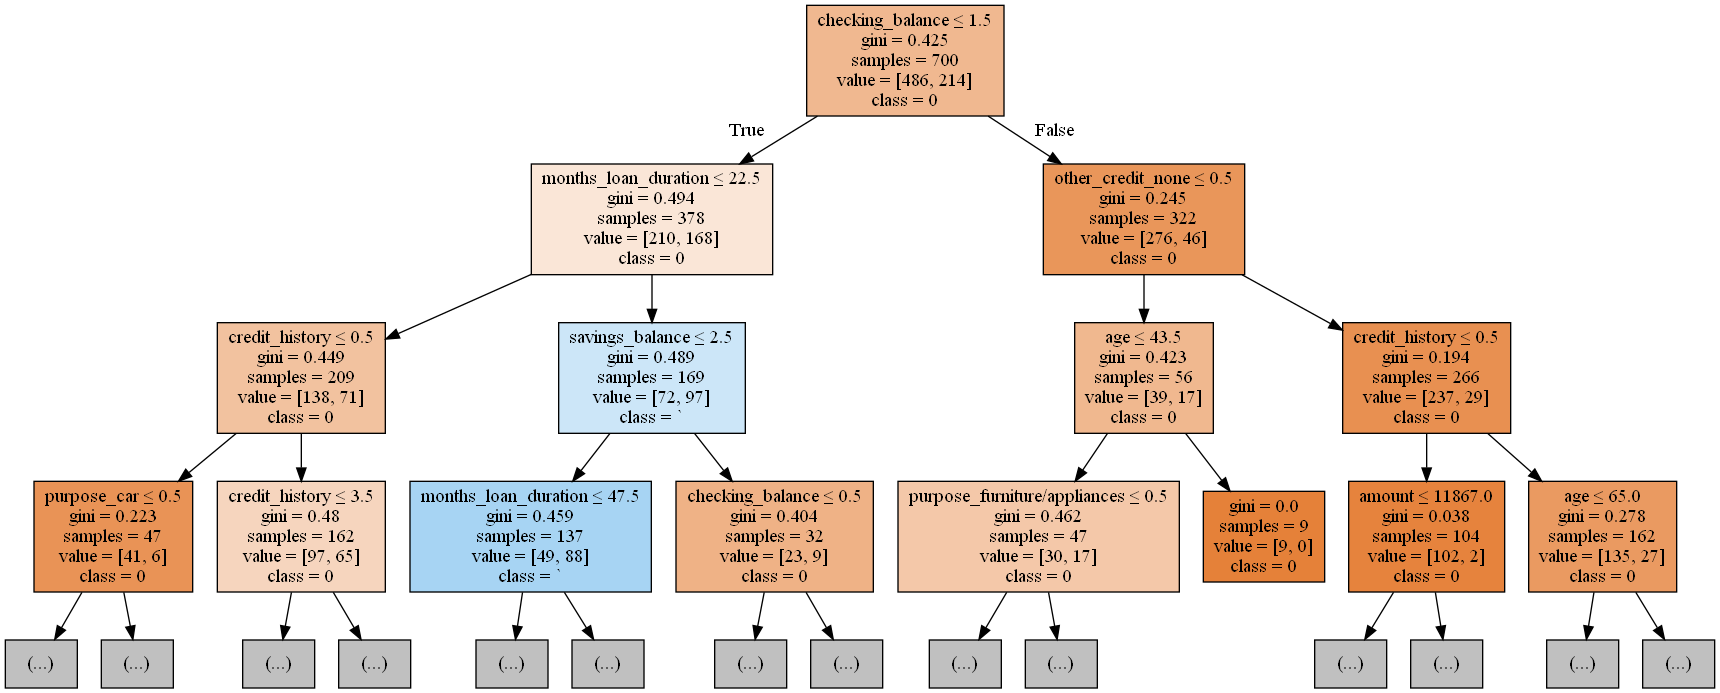

In [40]:
featues=x_train.columns
dot_data=StringIO()
export_graphviz(dtree,
    out_file=dot_data,
    max_depth=3,
    feature_names=featues,
    class_names=['0','`'],
    label='all',
    filled=True,
    leaves_parallel=False,
    impurity=True,
    node_ids=False,
    proportion=False,
    rotate=False,
    rounded=False,
    special_characters=True,
    precision=3)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [41]:
dtree1=DecisionTreeClassifier('gini', max_depth = 3, random_state=1)
dtree1.fit(x_train,y_train)
print('Trian score : ',dtree1.score(x_train,y_train))
print('Test score : ',dtree1.score(x_test,y_test))
yhat=dtree.predict(x_test)
print('')
print('confusion matrix')
print(metrics.confusion_matrix(y_test,yhat))
print(metrics.classification_report(y_test,yhat))

Trian score :  0.75
Test score :  0.7433333333333333

confusion matrix
[[164  50]
 [ 47  39]]
              precision    recall  f1-score   support

           0       0.78      0.77      0.77       214
           1       0.44      0.45      0.45        86

    accuracy                           0.68       300
   macro avg       0.61      0.61      0.61       300
weighted avg       0.68      0.68      0.68       300



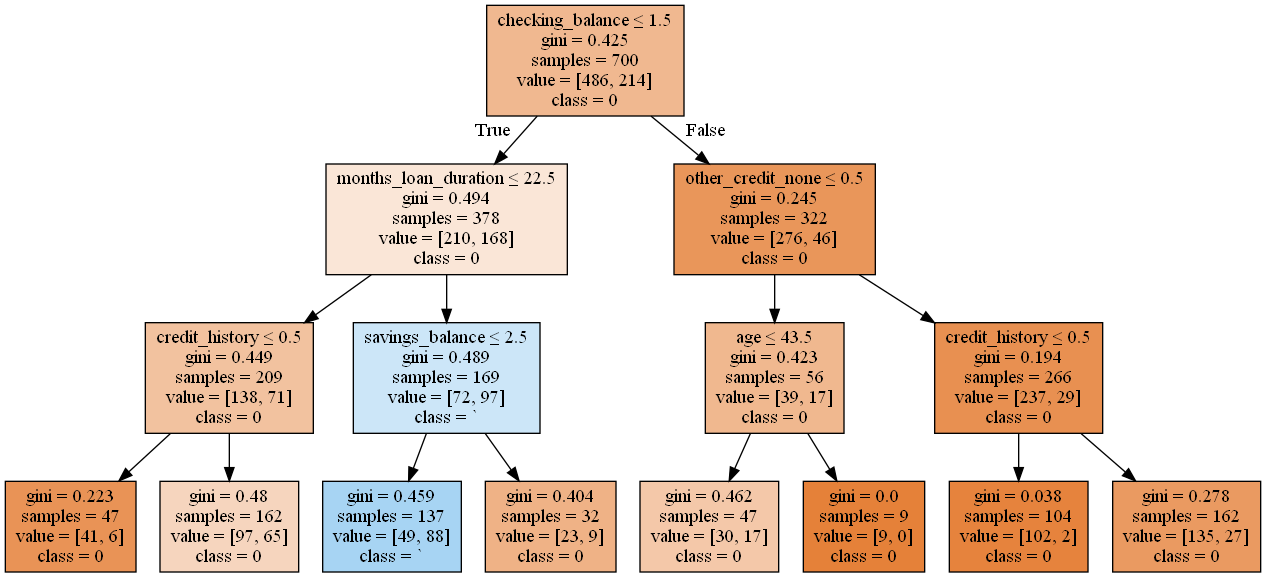

In [42]:
featues=x_train.columns
dot_data=StringIO()
export_graphviz(dtree1,
    out_file=dot_data,
    max_depth=3,
    feature_names=featues,
    class_names=['0','`'],
    label='all',
    filled=True,
    leaves_parallel=False,
    impurity=True,
    node_ids=False,
    proportion=False,
    rotate=False,
    rounded=False,
    special_characters=True,
    precision=3)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [44]:
pd.DataFrame(dtree1.feature_importances_,columns=['Important'],index=x_train.columns).sort_values('Important',ascending=False)

,Important
checking_balance,0.507427
months_loan_duration,0.164514
credit_history,0.131656
savings_balance,0.108518
other_credit_none,0.056178
age,0.031707
purpose_car,0.000000
housing_rent,0.000000
housing_own,0.000000
purpose_renovations,0.000000


### Ensemble Learning Bagging

In [67]:
from sklearn.ensemble import BaggingClassifier
bcf=BaggingClassifier(dtree1,n_estimators=50,random_state=1)
bcf.fit(x_train,y_train)
print('Trian score : ',bcf.score(x_train,y_train))
print('Test score : ',bcf.score(x_test,y_test))
yhat=bcf.predict(x_test)
print('')
print('confusion matrix')
print(metrics.confusion_matrix(y_test,yhat))
print(metrics.classification_report(y_test,yhat))

Trian score :  0.7657142857142857
Test score :  0.74

confusion matrix
[[195  19]
 [ 59  27]]
              precision    recall  f1-score   support

           0       0.77      0.91      0.83       214
           1       0.59      0.31      0.41        86

    accuracy                           0.74       300
   macro avg       0.68      0.61      0.62       300
weighted avg       0.72      0.74      0.71       300



### Ensemble Learning - AdaBoosting

In [71]:
from sklearn.ensemble import AdaBoostClassifier
boost=AdaBoostClassifier(dtree1,n_estimators=50,random_state=1)
boost.fit(x_train,y_train)
print('Trian score : ',boost.score(x_train,y_train))
print('Test score : ',boost.score(x_test,y_test))
yhat=boost.predict(x_test)
print('')
print('confusion matrix')
print(metrics.confusion_matrix(y_test,yhat))
print(metrics.classification_report(y_test,yhat))

Trian score :  1.0
Test score :  0.7033333333333334

confusion matrix
[[175  39]
 [ 50  36]]
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       214
           1       0.48      0.42      0.45        86

    accuracy                           0.70       300
   macro avg       0.63      0.62      0.62       300
weighted avg       0.69      0.70      0.70       300



In [75]:
from sklearn.ensemble import GradientBoostingClassifier
boost=GradientBoostingClassifier(n_estimators=50,random_state=1)
boost.fit(x_train,y_train)
print('Trian score : ',boost.score(x_train,y_train))
print('Test score : ',boost.score(x_test,y_test))
yhat=boost.predict(x_test)
print('')
print('confusion matrix')
print(metrics.confusion_matrix(y_test,yhat))
print(metrics.classification_report(y_test,yhat))

Trian score :  0.8642857142857143
Test score :  0.73

confusion matrix
[[193  21]
 [ 60  26]]
              precision    recall  f1-score   support

           0       0.76      0.90      0.83       214
           1       0.55      0.30      0.39        86

    accuracy                           0.73       300
   macro avg       0.66      0.60      0.61       300
weighted avg       0.70      0.73      0.70       300



In [82]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfc.fit(x_train,y_train)
yhat_rfc=rfc.predict(x_test)
print('Train score :',rfc.score(x_train,y_train))
print('Test score :',rfc.score(x_test,y_test))
print(metrics.confusion_matrix(y_test,yhat_rfc))
print(metrics.classification_report(y_test,yhat_rfc))

Train score : 0.9985714285714286
Test score : 0.73
[[188  26]
 [ 55  31]]
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       214
           1       0.54      0.36      0.43        86

    accuracy                           0.73       300
   macro avg       0.66      0.62      0.63       300
weighted avg       0.71      0.73      0.71       300

